In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from scipy.stats.mstats import winsorize
from mpl_toolkits.mplot3d import Axes3D



In [2]:
df = pd.read_csv('housing.csv')


In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


here in total_bedrooms there are some missing values,  around 150 values, so i will drop those values.

In [5]:
df.dropna(inplace=True)#dropped all the tuples with missing values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [7]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000,20433.000000
mean,-119.570689,35.633221,28.633094,2636.504233,537.870553,1424.946949,499.433465,3.871162,206864.413155
std,2.003578,2.136348,12.591805,2185.269567,421.385070,1133.208490,382.299226,1.899291,115435.667099
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1450.000000,296.000000,787.000000,280.000000,2.563700,119500.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.536500,179700.000000
75%,-118.010000,37.720000,37.000000,3143.000000,647.000000,1722.000000,604.000000,4.744000,264700.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


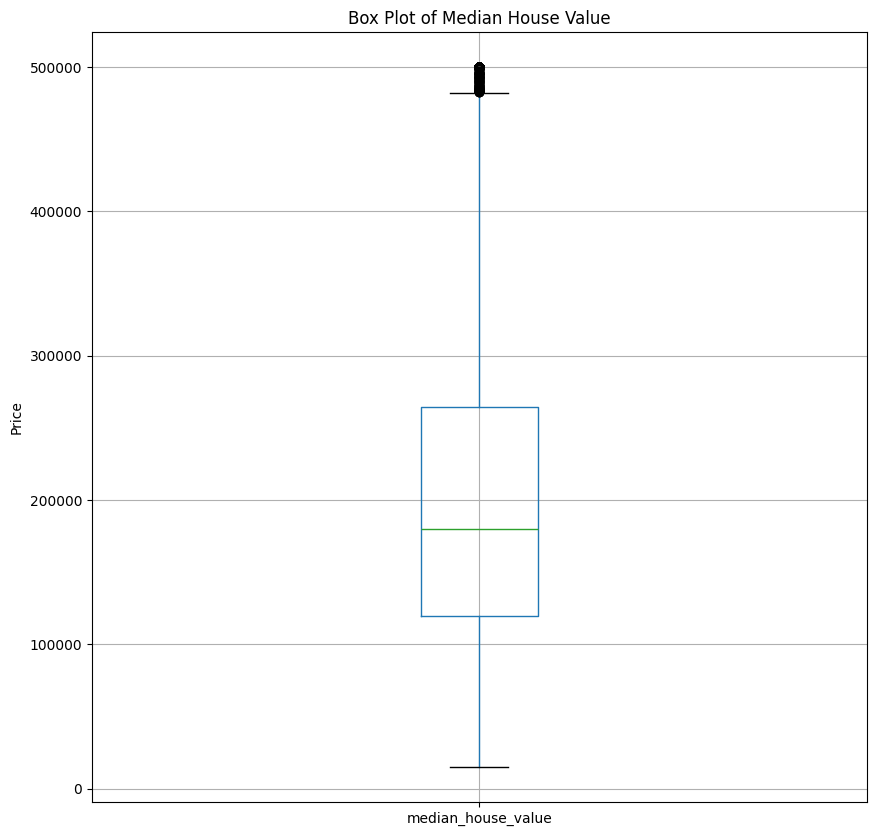

In [8]:
df.boxplot(column=['median_house_value'], figsize=(10, 10))
plt.title('Box Plot of Median House Value')
plt.ylabel('Price')
plt.show()

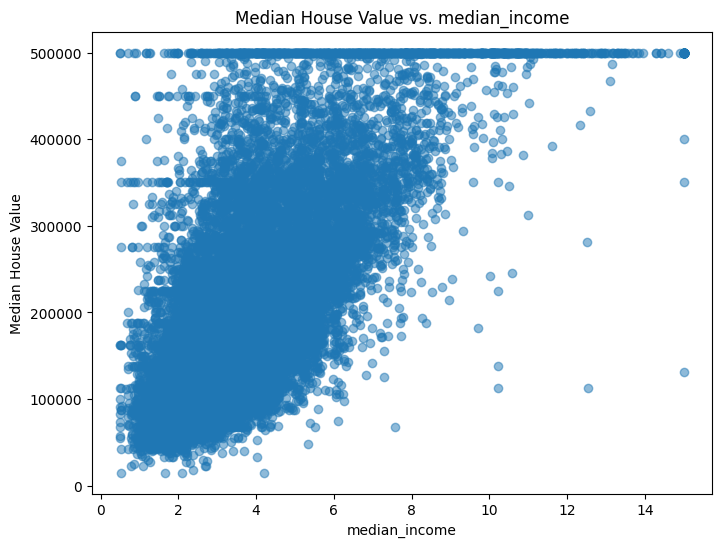

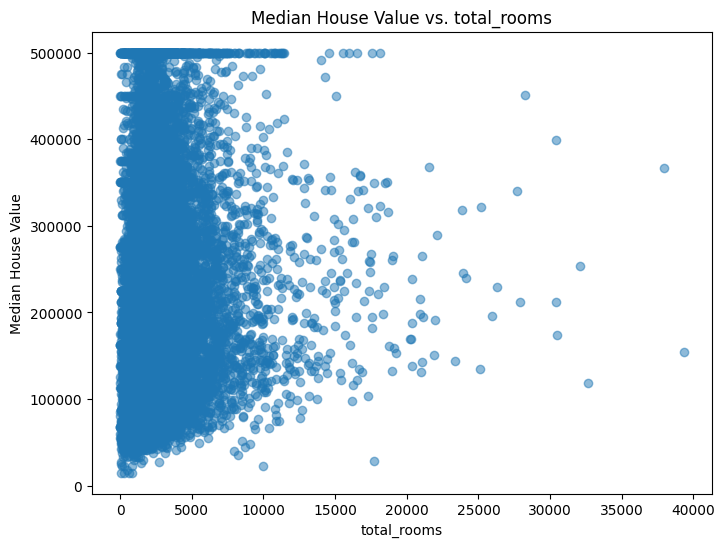

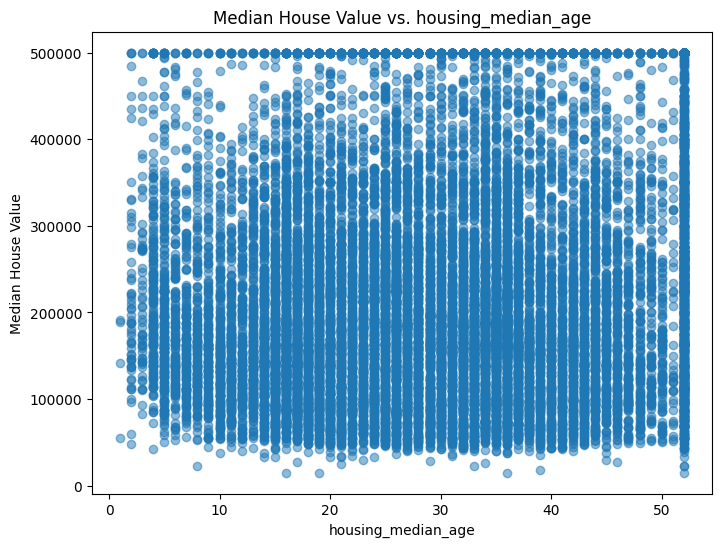

In [9]:
# Features to plot against median_house_value
features = ['median_income', 'total_rooms', 'housing_median_age']

# Create scatterplots for each feature
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['median_house_value'], alpha=0.5)  # alpha for transparency
    plt.title(f'Median House Value vs. {feature}')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()
    

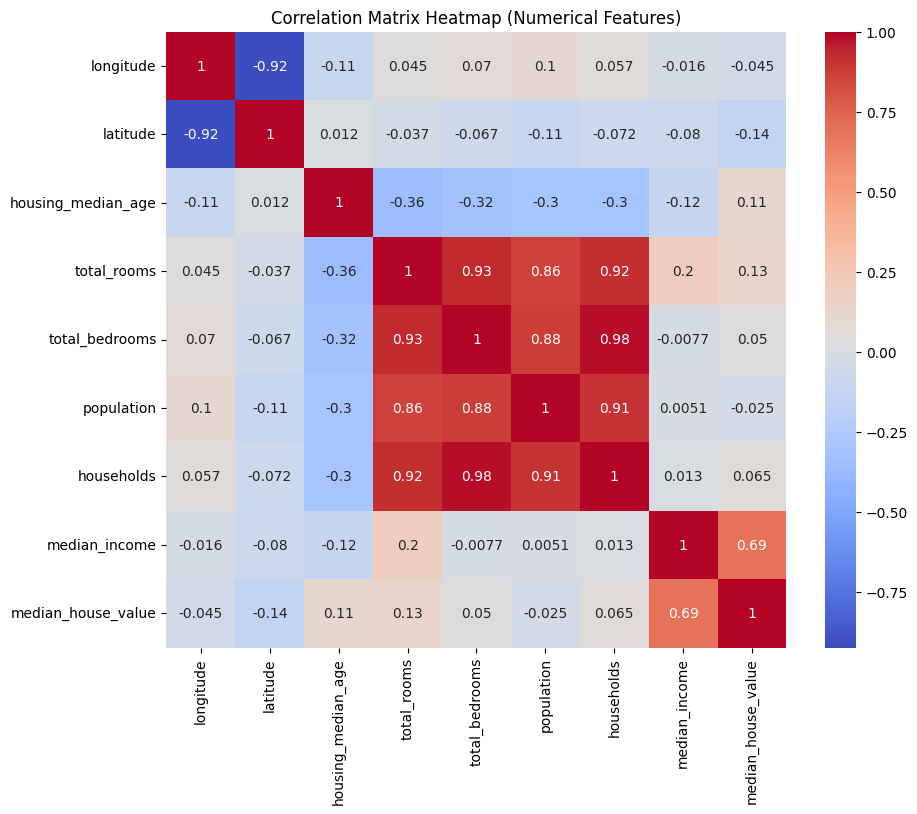

In [10]:
# Selecting only  numeric columns (excluding 'ocean_proximity')
numeric_df = df.select_dtypes(include=['float64']) 

# Calculate correlation matrix
corr_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

we can see that income is highly co related with house value, and longitude and latitude are negatively corelated

In [11]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

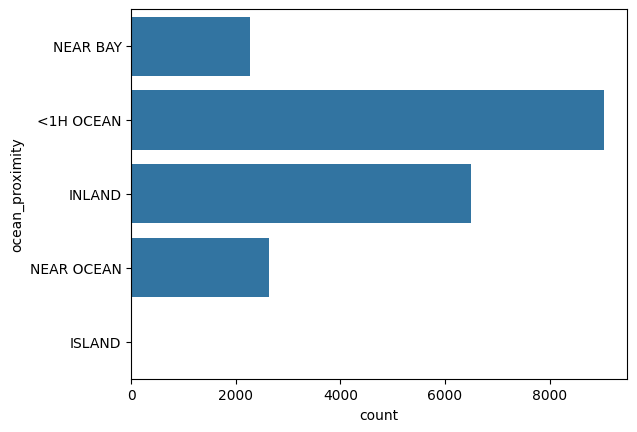

In [12]:
sns.countplot(df.ocean_proximity)
plt.show()

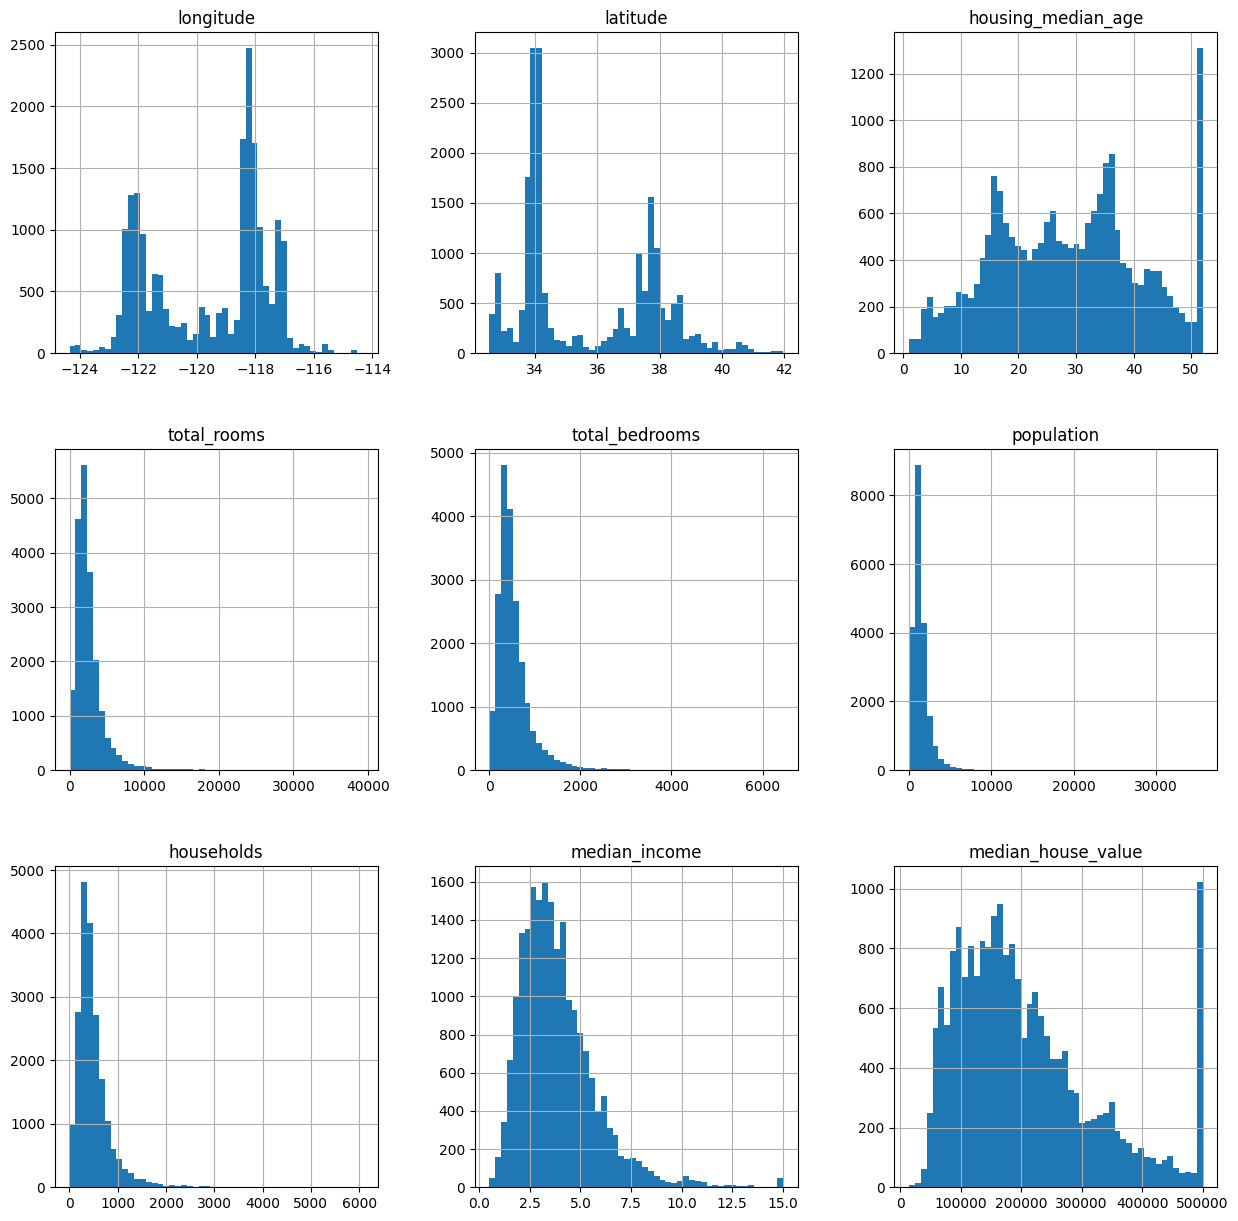

In [13]:
df.hist(bins=50, figsize=(15, 15))
plt.show()

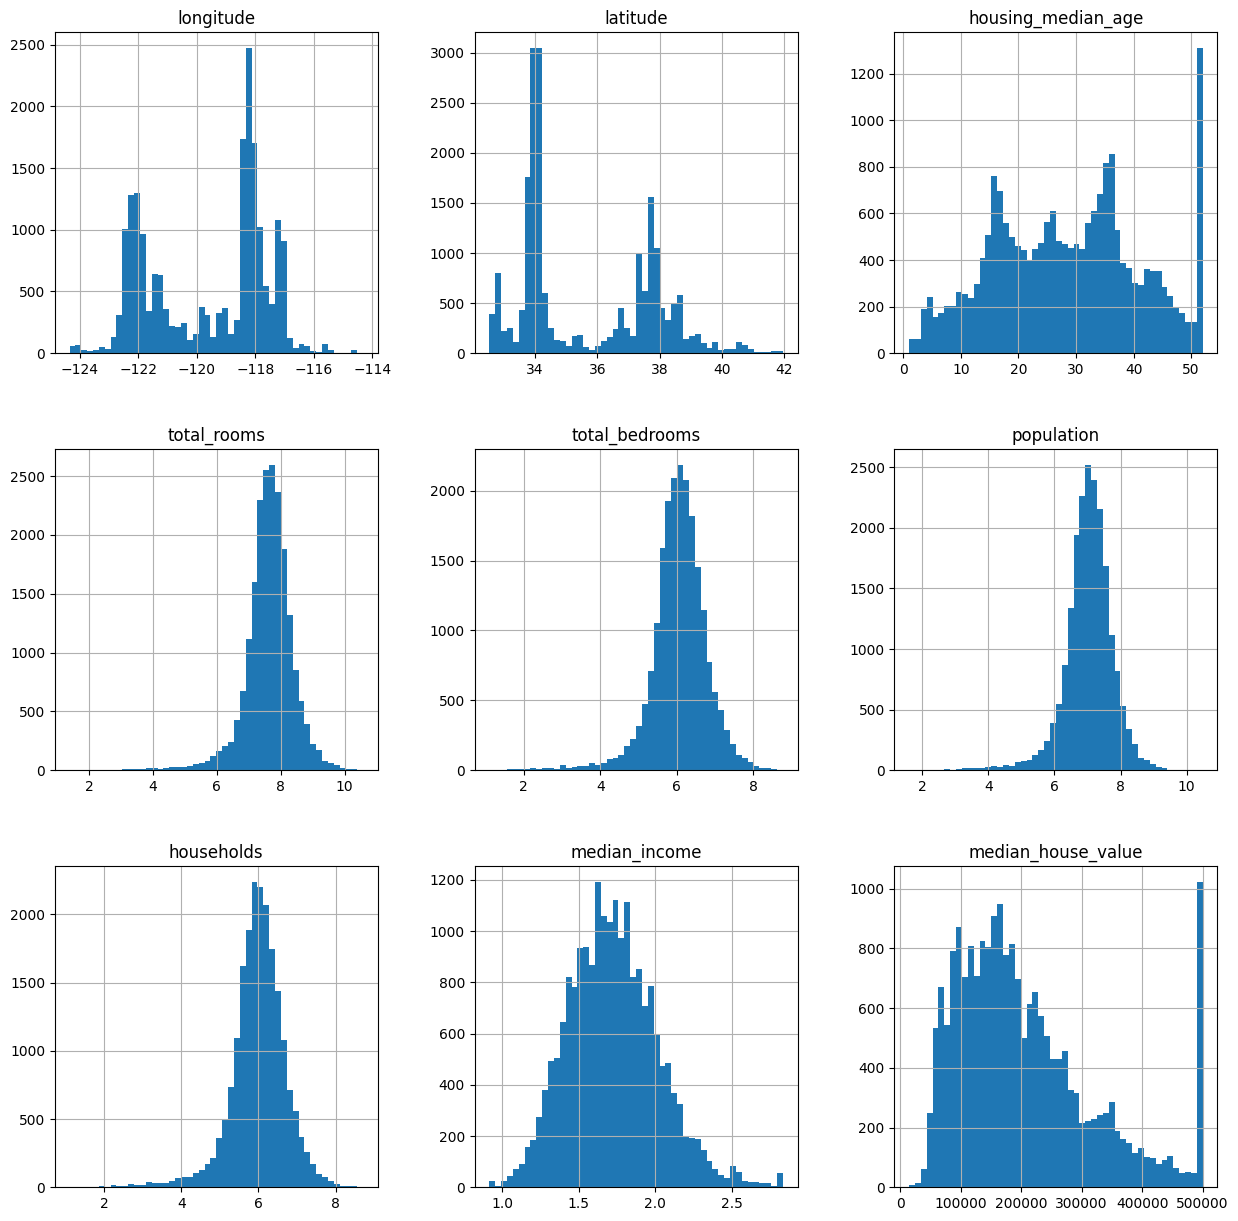

In [14]:
features_to_transform = ["total_rooms", "total_bedrooms", "population", "households", "median_income"]

# Apply log transformation
for feature in features_to_transform:
    df[feature] = np.log1p(df[feature]+1)
    
df.hist(bins=50, figsize=(15, 15))
plt.show()

In [15]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
ISLAND           5
Name: count, dtype: int64

we do one hot encoding for the ocean_proximity, and merge it in the original dataset

In [16]:
df = df.join(pd.get_dummies(df['ocean_proximity'])).drop(['ocean_proximity'], axis=1)


In [17]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41.0,6.782192,4.875197,5.780744,4.852030,2.334588,452600.0,False,False,False,True,False
1,-122.22,37.86,21.0,8.867991,7.010312,7.784473,7.038784,2.332280,358500.0,False,False,False,True,False
2,-122.24,37.85,52.0,7.292337,5.257495,6.210600,5.187386,2.225423,352100.0,False,False,False,True,False
3,-122.25,37.85,52.0,7.151485,5.468060,6.327937,5.398163,2.033803,341300.0,False,False,False,True,False
4,-122.25,37.85,52.0,7.395722,5.641907,6.340359,5.564520,1.765792,342200.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,7.418781,5.929589,6.741701,5.805135,1.269845,78100.0,False,True,False,False,False
20636,-121.21,39.49,18.0,6.549651,5.023881,5.880533,4.753590,1.516621,77100.0,False,True,False,False,False
20637,-121.22,39.43,17.0,7.721349,6.188264,6.916715,6.075346,1.308333,92300.0,False,True,False,False,False
20638,-121.32,39.43,18.0,7.529406,6.018593,6.610696,5.860786,1.352531,84700.0,False,True,False,False,False


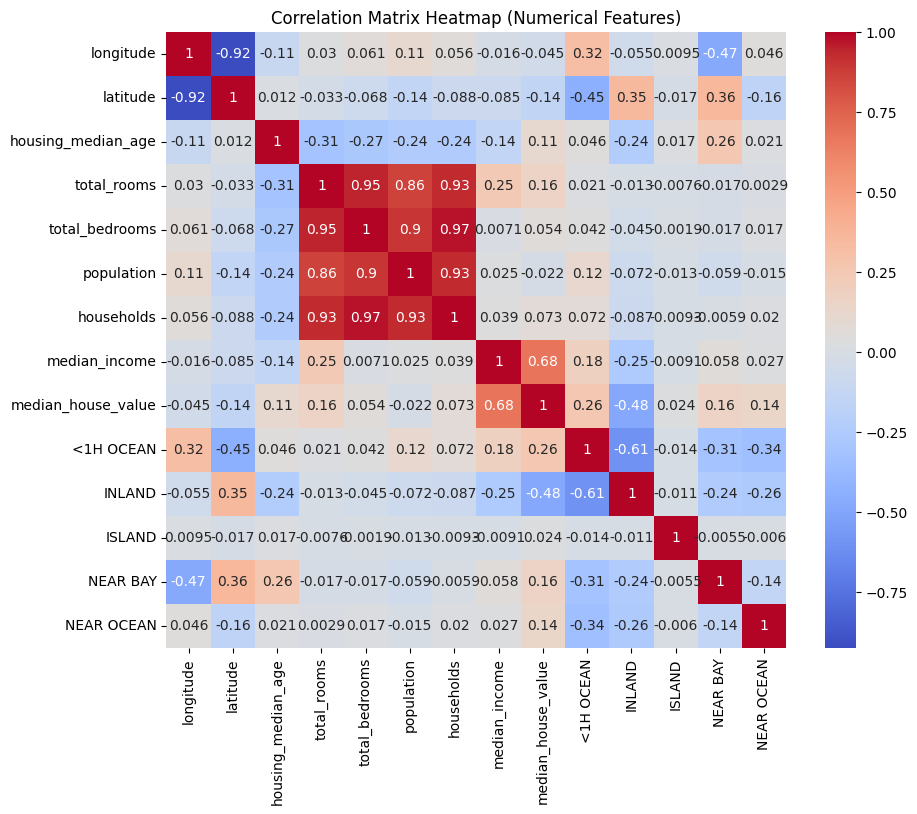

In [18]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

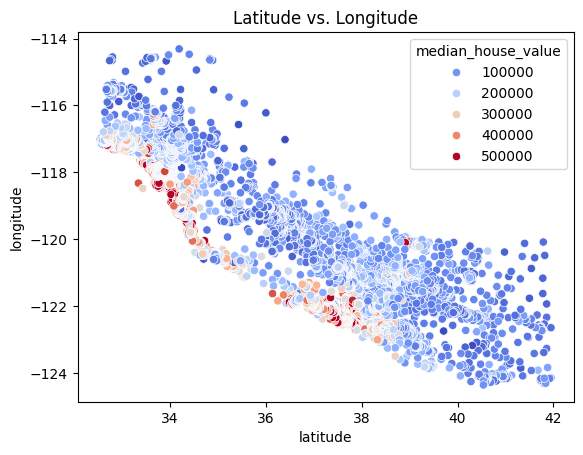

In [19]:
plt.figsize=(10, 18)
sns.scatterplot(x='latitude', y='longitude', data=df, hue='median_house_value', palette='coolwarm')
plt.title('Latitude vs. Longitude')
plt.show()

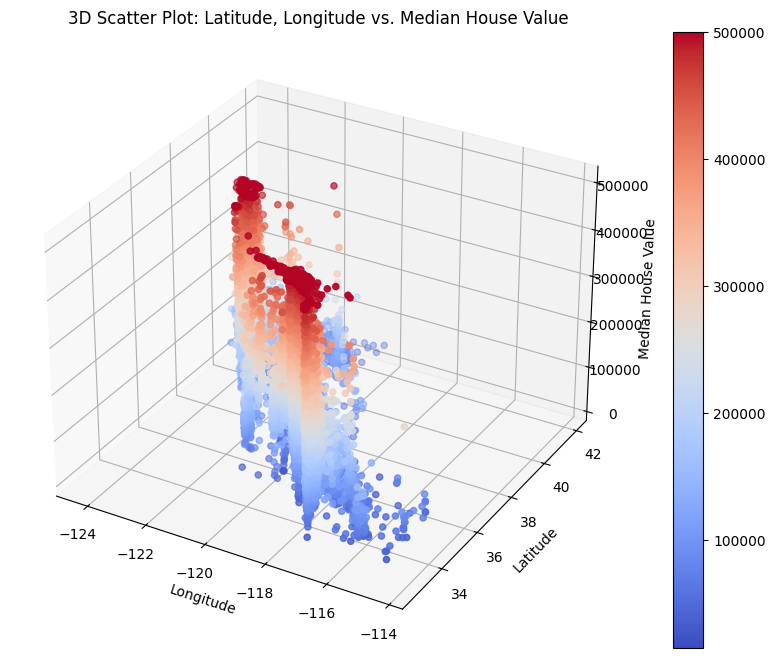

In [20]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colormap
img = ax.scatter(df['longitude'], df['latitude'], df['median_house_value'], c=df['median_house_value'], cmap='coolwarm')

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_zlabel('Median House Value')
# ax.view_init(elev=10, azim=90)
plt.title('3D Scatter Plot: Latitude, Longitude vs. Median House Value')
fig.colorbar(img)  # Add a color bar to interpret the colors
plt.show()


In [21]:
df['location_new']=df['latitude']*df['longitude']
df['room_ratio']=df['total_rooms']/df['households']
df['population_ratio']=df['population']/df['households']
df['bedroom_ratio']=df['total_bedrooms']/df['total_rooms']

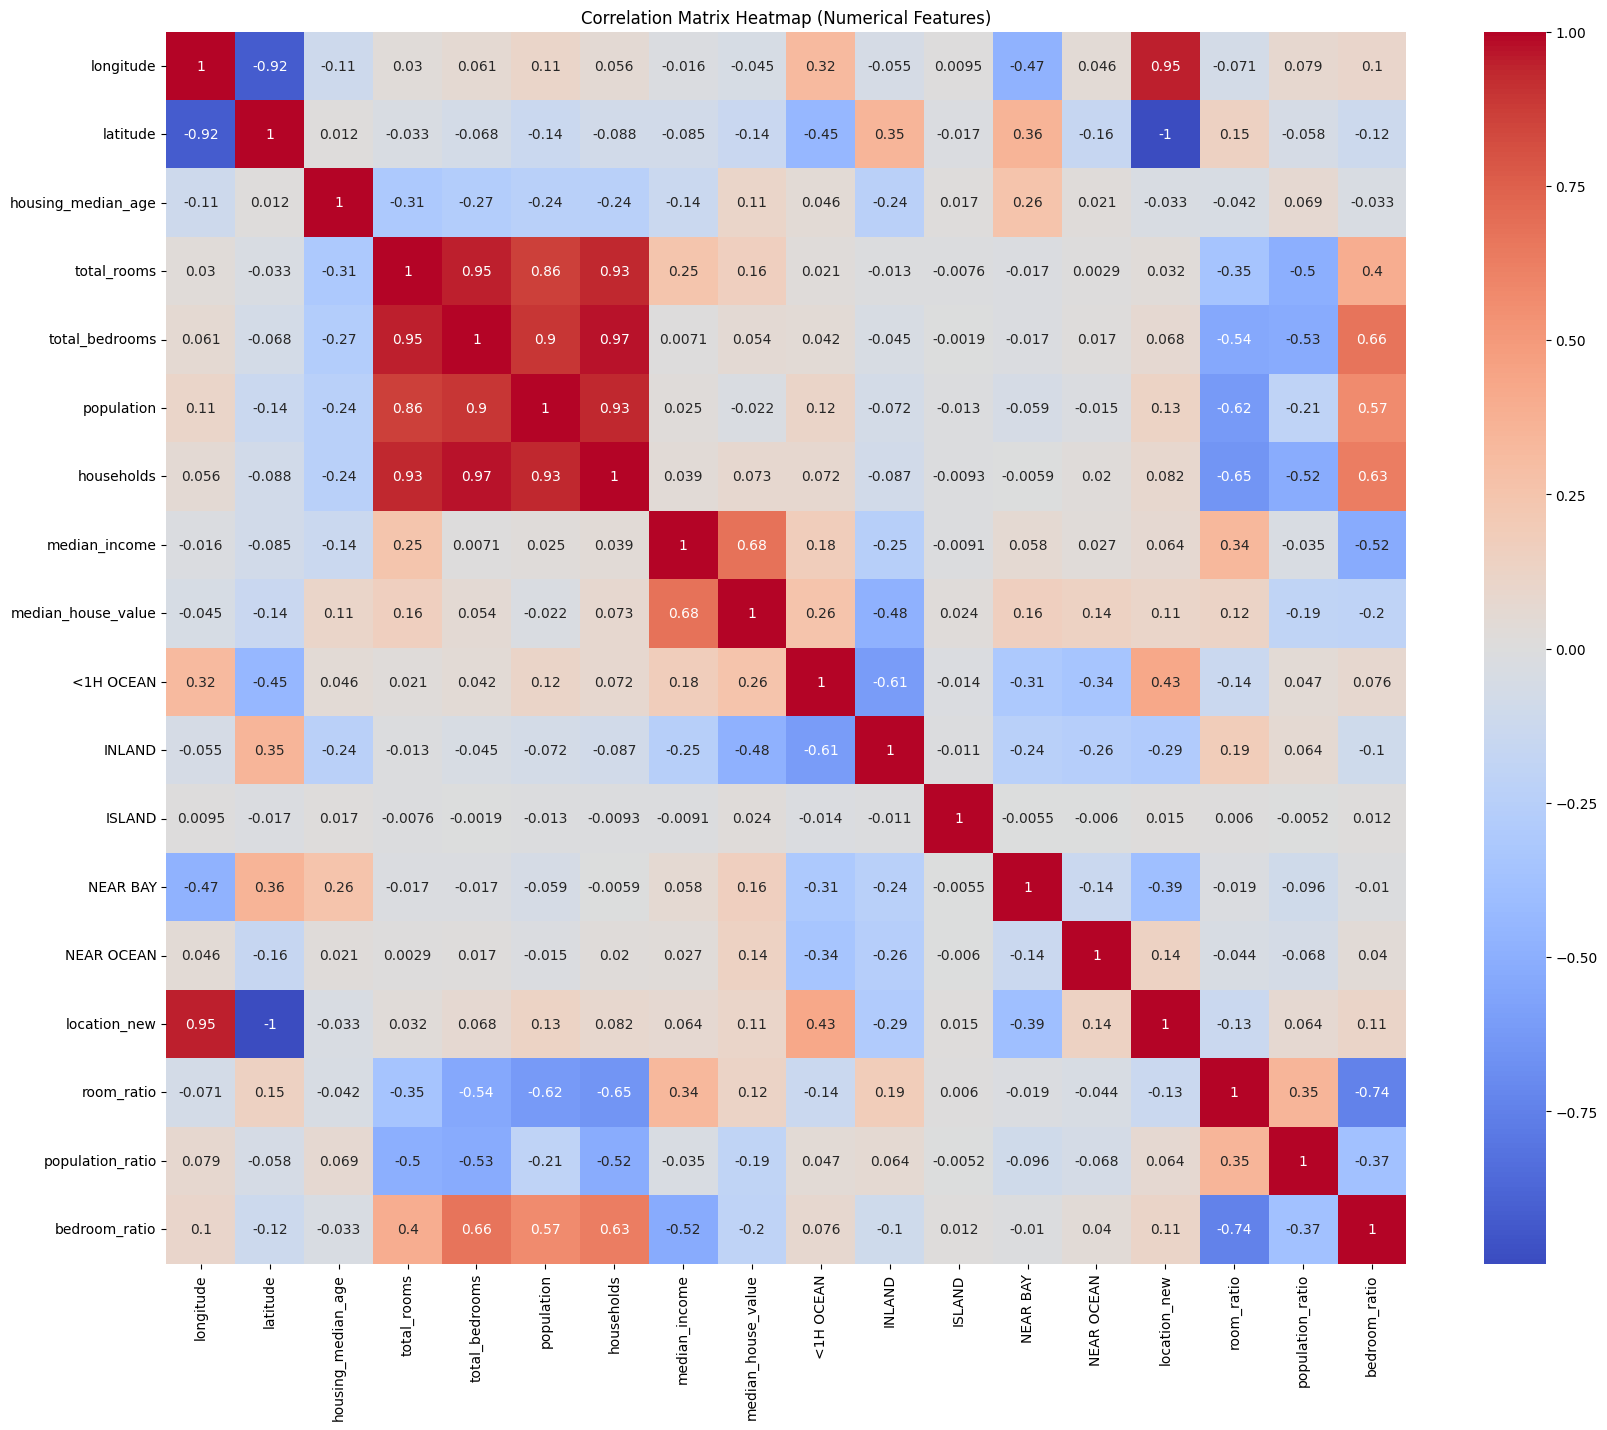

In [22]:
plt.figure(figsize=(20, 16))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

In [23]:
# Drop the highly correlated features 
df = df.drop(['total_rooms', 'total_bedrooms', 'population', 'households', 'bedroom_ratio', 'population_ratio'], axis=1)

# Display the remaining columns
print(df.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'median_income',
       'median_house_value', '<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY',
       'NEAR OCEAN', 'location_new', 'room_ratio'],
      dtype='object')


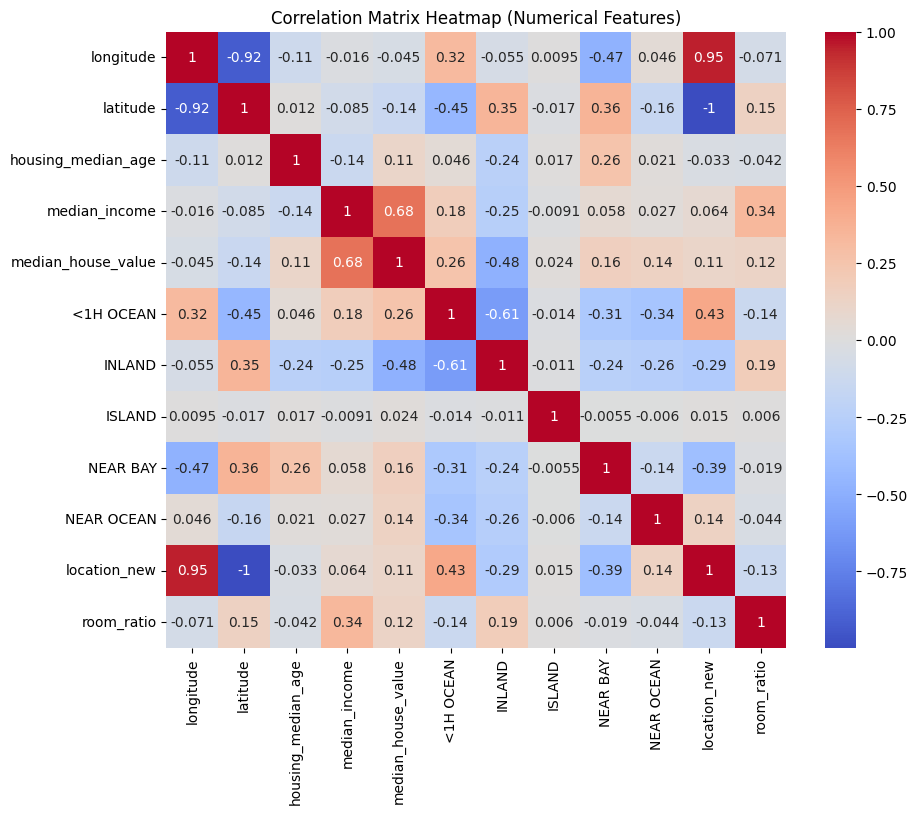

In [24]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm') 
plt.title('Correlation Matrix Heatmap (Numerical Features)')
plt.show()

In [25]:
# Split data into features (X) and target (y)
X = df.drop("median_house_value", axis=1)  # Features (all columns except the target)
y = df["median_house_value"]            # Target variable

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) 

In [26]:
print("Training set size:", len(X_train))
print("Testing set size:", len(X_test))

Training set size: 16346
Testing set size: 4087


In [27]:
numeric_features = ['longitude', 'latitude', 'housing_median_age', 'median_income', 'location_new', 'room_ratio']

# Initialize StandardScaler
scaler = StandardScaler()

# Fit scaler to the training set and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train[numeric_features])
X_test_scaled = scaler.transform(X_test[numeric_features])

# Convert the scaled arrays back to DataFrames to maintain column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=numeric_features, index=X_train.index)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=numeric_features, index=X_test.index)

# Combine with one-hot encoded features
X_train_final = pd.concat([X_train_scaled, X_train.drop(columns=numeric_features)], axis=1)
X_test_final = pd.concat([X_test_scaled, X_test.drop(columns=numeric_features)], axis=1)


In [28]:

# Create a linear regression model
model = LinearRegression()
model.fit(X_train_final, y_train)
y_pred = model.predict(X_test_final)


In [29]:
# Calculate evaluation metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_score(y_test, y_pred)

print(f'RMSE: {rmse}')
print(f'R^2: {r2}')

RMSE: 74733.06633878157


NameError: name 'r2' is not defined

In [ ]:
# Create a decision tree model
tree_model = DecisionTreeRegressor(random_state=42) 

# Train the model on the training set
tree_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_tree = tree_model.predict(X_test_final)

# Evaluate the model's performance
tree_mse = mean_squared_error(y_test, y_pred_tree)
tree_rmse = np.sqrt(tree_mse)
tree_r2 = r2_score(y_test, y_pred_tree)


print("Decision Tree RMSE:", tree_rmse)
print("Decision Tree R^2:", tree_r2)

Decision Tree RMSE: 65375.314745080585
Decision Tree R^2: 0.6874679870866073


In [ ]:
# Create a random forest model
forest_model = RandomForestRegressor(random_state=42) 

# Train the model on the training set
forest_model.fit(X_train_final, y_train)

# Make predictions on the test set
y_pred_forest = forest_model.predict(X_test_final)

# Evaluate the model's performance
forest_mse = mean_squared_error(y_test, y_pred_forest)
forest_rmse = np.sqrt(forest_mse)
forest_r2 = r2_score(y_test, y_pred_forest)

print("Random Forest RMSE:", forest_rmse)
print("Random Forest R^2:", forest_r2)

Random Forest RMSE: 48765.93764627922
Random Forest R^2: 0.826099799942175


In [ ]:

param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],     # Maximum depth of the trees
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_final, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best estimator:", grid_search.best_estimator_)
print("Best score:", np.sqrt(-grid_search.best_score_))


Best parameters: {'max_depth': 20, 'n_estimators': 100}
Best estimator: RandomForestRegressor(max_depth=20, random_state=42)
Best score: 48896.62672028792


In [ ]:
y_pred = grid_search.best_estimator_.predict(X_test_final)
# Evaluate the model's performance on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_pred)

print("Test RMSE:", test_rmse)
print("Test R-squared:", test_r2)

Test RMSE: 48841.42344065681
Test R-squared: 0.8255610158994613
